# Nuclei Detect  demo

This notebook can be used to predict cells and nuclei given one has the sufficient model and data

In [38]:
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import random
#import requests
from io import BytesIO
from PIL import Image
import numpy as np
import os

Those are the relevant imports for the detection model

In [39]:
from maskrcnn_benchmark.config import cfg
pylab.rcParams['figure.figsize'] = 20, 12

# importing the prediction class
from predictor import NUCLEIdemo

The NUCLEIdemo class can load the config file and does the image prediction.

In [40]:
configuration_file = "../configs/nuclei_1gpu_nonorm_offline.yaml"

# update the config options with the config file
cfg.merge_from_file(configuration_file)

# manual override some options
cfg.merge_from_list(["MODEL.DEVICE", "cpu"])

# change dimensions of test images
cfg.merge_from_list(['INPUT.MAX_SIZE_TEST','2049'])

# change number of classes
cfg.merge_from_list(['MODEL.ROI_BOX_HEAD.NUM_CLASSES','4'])

# change normalization, here model was not normalized
cfg.merge_from_list(['INPUT.PIXEL_MEAN', [0., 0., 0.]])

# define model to use here
cfg.merge_from_list(['MODEL.WEIGHT', '/home/maxsen/DEEPL/data/models/model_final.pth'])

# define how many objects can be identified per image
cfg.merge_from_list(['TEST.DETECTIONS_PER_IMG', '120'])

# show the configuration
print(cfg)

DATALOADER:
  ASPECT_RATIO_GROUPING: False
  NUM_WORKERS: 4
  SIZE_DIVISIBILITY: 32
DATASETS:
  TEST: ('coco_complete_popped_test',)
  TRAIN: ('coco_offline_augmented_train', 'coco_offline_augmented_val')
INPUT:
  HEIGHT_IS_WIDTH: False
  MAX_SIZE_TEST: 2049
  MAX_SIZE_TRAIN: 1025
  MIN_SIZE_TEST: 800
  MIN_SIZE_TRAIN: (1024,)
  PIXEL_MEAN: [0.0, 0.0, 0.0]
  PIXEL_STD: [1.0, 1.0, 1.0]
  TO_BGR255: True
MODEL:
  BACKBONE:
    CONV_BODY: R-50-FPN
    FREEZE_CONV_BODY_AT: 2
    USE_GN: False
  CLS_AGNOSTIC_BBOX_REG: False
  DEVICE: cpu
  FBNET:
    ARCH: default
    ARCH_DEF: 
    BN_TYPE: bn
    DET_HEAD_BLOCKS: []
    DET_HEAD_LAST_SCALE: 1.0
    DET_HEAD_STRIDE: 0
    DW_CONV_SKIP_BN: True
    DW_CONV_SKIP_RELU: True
    KPTS_HEAD_BLOCKS: []
    KPTS_HEAD_LAST_SCALE: 0.0
    KPTS_HEAD_STRIDE: 0
    MASK_HEAD_BLOCKS: []
    MASK_HEAD_LAST_SCALE: 0.0
    MASK_HEAD_STRIDE: 0
    RPN_BN_TYPE: 
    RPN_HEAD_BLOCKS: 0
    SCALE_FACTOR: 1.0
    WIDTH_DIVISOR: 1
  FPN:
    USE_GN: False
    US

Change the confidence threshold.

In [41]:
nuclei_detect = NUCLEIdemo(
    cfg,
    min_image_size=512,
    confidence_threshold=0.7,
)

Let's define a few helper functions for loading images from a URL

In [42]:
# load image
def load(path):
    pil_image = Image.open(path).convert("RGB")
    # convert to BGR format
    image = np.array(pil_image)[:, :, [2, 1, 0]]
    return image

# show image alongside the result and save if necessary
def imshow(img, result, save_path=None):
    fig = plt.figure()
    ax1 = fig.add_subplot(1,2,1)
    ax1.imshow(img)
    plt.axis('off')
    ax2 = fig.add_subplot(1,2,2)
    ax2.imshow(result)
    plt.axis('off')
    if save_path:
        plt.savefig(save_path, bbox_inches = 'tight')
        plt.show()
    else:
        plt.show()

### Define the image paths and show the results

Image ../images/slices/Nuclei_SN_Hyb2_pos_89_01_02.png is handled.
Image shape:  (1024, 1024, 3)
scores_____ [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9999998807907104, 0.9999997615814209, 0.9999994039535522, 0.999998927116394, 0.9999988079071045, 0.9999978542327881, 0.9999964237213135, 0.9999963045120239, 0.9999920129776001, 0.9999467134475708, 0.9999135732650757, 0.9990532994270325, 0.9983121156692505, 0.9917678833007812, 0.7867277264595032]
labels_____ [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2]


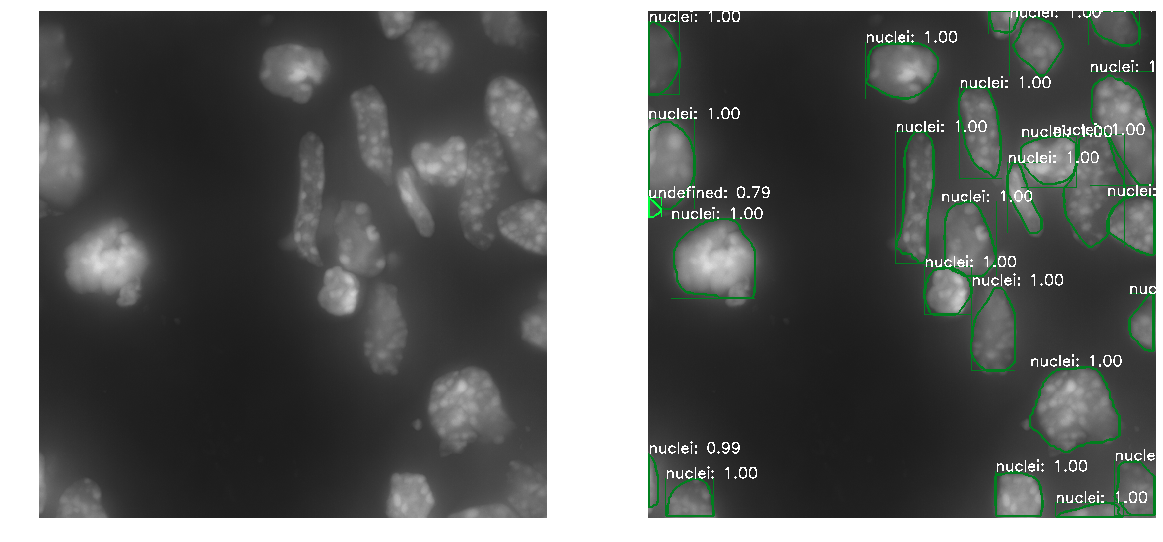

In [85]:
img_path = '../images/slices/'

# random image is taken from the image path
random_img = random.choice(os.listdir(img_path))
print('Image {} is handled.'.format(img_path + random_img))
image = load(img_path + random_img)
print('Image shape: ',image.shape)

# results are computed
results, predictions = nuclei_detect.run_on_opencv_image(image)
imshow(image, results)